# Titanic 

## Attribute info:
    1) Passenger Id: Unique Number assigned to each passenger
    2) Survival: 0 = No, 1 = Yes
    3) Pclass: 1 = 1st, 2 = 2nd, 3 = 3rd
    4) Sex: Male or Female	
    5) Age:	Age in years	
    6) Sibsp: No of siblings/spouses aboard the Titanic	
    7) Parch: No of parents/children aboard the Titanic	
    8) Ticket: Ticket number	
    9) Fare: Passenger fare	
    10) Cabin: Cabin number	
    11) Embarked: C = Cherbourg, Q = Queenstown, S = Southampton

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
%matplotlib inline
sns.set_style("darkgrid")
warnings.filterwarnings("ignore")
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


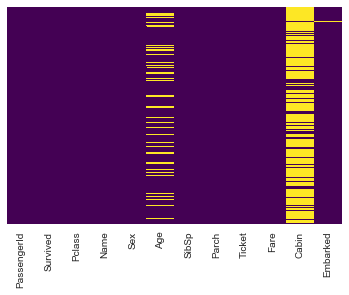

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There is some missing data in the columns Age, Cabin and Embarked. For visualization we will use this data and when we go for Machine Learning part we will be cleaning the data and filling the missing values.

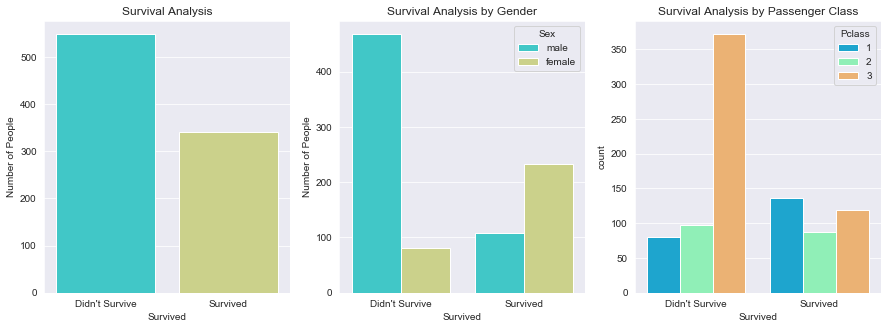

In [6]:
fig,ax = plt.subplots(1,3,figsize = (15,5))

ax[0].set_title('Survival Analysis')
fig = sns.countplot(x='Survived',data=df,palette='rainbow',ax = ax[0])
ax[0].set_ylabel('Number of People')
fig.set(xticklabels=["Didn't Survive","Survived"])

ax[1].set_title('Survival Analysis by Gender')
fig = sns.countplot(x='Survived',hue='Sex',data=df,palette='rainbow',ax = ax[1])
ax[1].set_ylabel('Number of People')
fig.set(xticklabels=["Didn't Survive","Survived"])

ax[2].set_title('Survival Analysis by Passenger Class')
fig = sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow',ax=ax[2])
ax[1].set_ylabel('Number of People')
fig.set(xticklabels=["Didn't Survive","Survived"]);

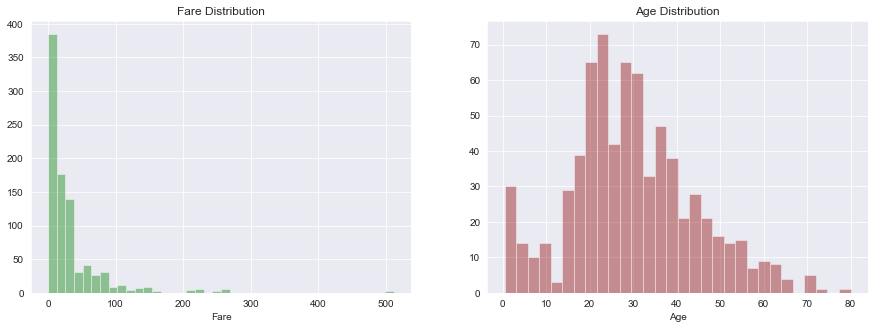

In [7]:
fig,ax = plt.subplots(1,2,figsize = (15,5))

ax[0].set_title('Fare Distribution')
sns.distplot(df['Fare'].dropna(),kde=False,color='green',bins=40,ax = ax[0])

ax[1].set_title('Age Distribution')
sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=30,ax = ax[1]);

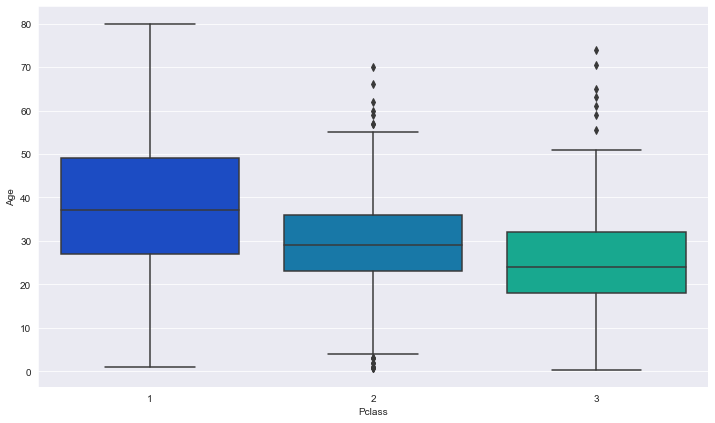

In [19]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter');

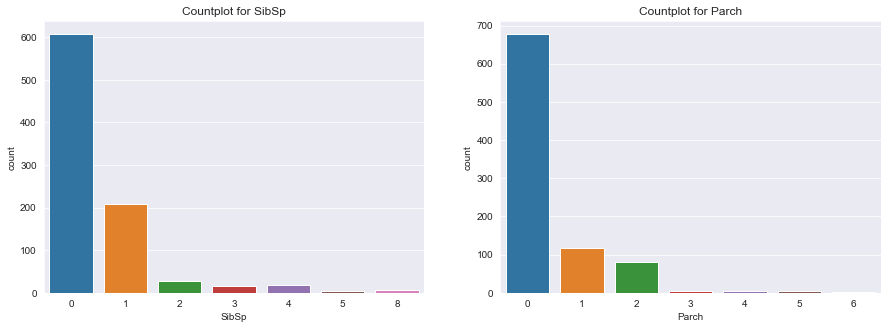

In [24]:
fig,ax = plt.subplots(1,2,figsize = (15,5))

sns.countplot(df['SibSp'],ax = ax[0])
ax[0].set_title('Countplot for SibSp');

sns.countplot(df['Parch'],ax = ax[1])
ax[1].set_title('Countplot for Parch');

In [25]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [26]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

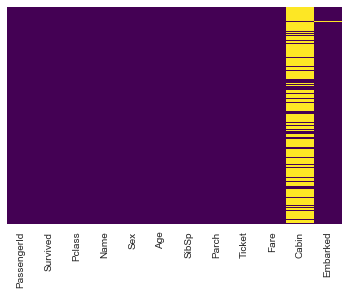

In [27]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [28]:
df.drop('Cabin',axis=1,inplace=True)

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [30]:
df.dropna(inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [32]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [33]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [34]:
df = pd.concat([df,sex,embark],axis=1)

In [35]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [36]:
df.drop('Q',inplace = True,axis = 1)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], test_size=0.24, 
                                                    random_state=1)

In [38]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
predictions = logmodel.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score

In [44]:
print(confusion_matrix(y_test,predictions))

[[118  12]
 [ 18  66]]


In [46]:
print('The accuracy of our Logistics Regression model is:',accuracy_score(y_test,predictions))

print('The Recall Score is: ',recall_score(y_test,predictions))

print('The Precision Score is: ',precision_score(y_test,predictions))

print('The F1 Score is: ',f1_score(y_test,predictions))

The accuracy of our Logistics Regression model is: 0.8598130841121495
The Recall Score is:  0.7857142857142857
The Precision Score is:  0.8461538461538461
The F1 Score is:  0.8148148148148148
